## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

## Importing the dataset

In [2]:
df = pd.read_csv('200125_LoL_champion_data.csv') 
sf = pd.read_csv('200125_LoL_champion_data.csv') 
sf.head()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,4800,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,3150,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,3150,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,4800,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,1350,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


In [3]:
df.head()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,4800,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,3150,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,3150,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,4800,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,1350,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


## Cleaning the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

In [5]:
df.isnull()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
168,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [6]:
df.isnull().sum()

Unnamed: 0              0
id                      0
apiname                 0
title                   0
difficulty              0
herotype                0
alttype                28
resource                5
stats                   0
rangetype               0
date                    0
patch                   0
changes                 0
role                    0
client_positions        0
external_positions      0
damage                  0
toughness               0
control                 0
mobility                0
utility                 0
style                   0
adaptivetype            0
be                      0
rp                      0
skill_i                 0
skill_q                 0
skill_w                 0
skill_e                 0
skill_r                 0
skills                  2
fullname              129
nickname              158
dtype: int64

In [7]:
df.isnull().mean()*100

Unnamed: 0             0.000000
id                     0.000000
apiname                0.000000
title                  0.000000
difficulty             0.000000
herotype               0.000000
alttype               16.279070
resource               2.906977
stats                  0.000000
rangetype              0.000000
date                   0.000000
patch                  0.000000
changes                0.000000
role                   0.000000
client_positions       0.000000
external_positions     0.000000
damage                 0.000000
toughness              0.000000
control                0.000000
mobility               0.000000
utility                0.000000
style                  0.000000
adaptivetype           0.000000
be                     0.000000
rp                     0.000000
skill_i                0.000000
skill_q                0.000000
skill_w                0.000000
skill_e                0.000000
skill_r                0.000000
skills                 1.162791
fullname

In [8]:
df.drop(columns=['nickname'],inplace=True)
df.drop(columns=['fullname'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

In [10]:
df.isnull().mean()*100

Unnamed: 0             0.000000
id                     0.000000
apiname                0.000000
title                  0.000000
difficulty             0.000000
herotype               0.000000
alttype               16.279070
resource               2.906977
stats                  0.000000
rangetype              0.000000
date                   0.000000
patch                  0.000000
changes                0.000000
role                   0.000000
client_positions       0.000000
external_positions     0.000000
damage                 0.000000
toughness              0.000000
control                0.000000
mobility               0.000000
utility                0.000000
style                  0.000000
adaptivetype           0.000000
be                     0.000000
rp                     0.000000
skill_i                0.000000
skill_q                0.000000
skill_w                0.000000
skill_e                0.000000
skill_r                0.000000
skills                 1.162791
dtype: f

## Filling the missing values

In [11]:
df['alttype'] = df['alttype'].fillna(df['alttype'].mode()[0])
df['resource'] = df['resource'].fillna(df['resource'].mode()[0])
df['skills'] = df['skills'].fillna(df['skills'].mode()[0])

In [12]:
df.isnull().mean()*100

Unnamed: 0            0.0
id                    0.0
apiname               0.0
title                 0.0
difficulty            0.0
herotype              0.0
alttype               0.0
resource              0.0
stats                 0.0
rangetype             0.0
date                  0.0
patch                 0.0
changes               0.0
role                  0.0
client_positions      0.0
external_positions    0.0
damage                0.0
toughness             0.0
control               0.0
mobility              0.0
utility               0.0
style                 0.0
adaptivetype          0.0
be                    0.0
rp                    0.0
skill_i               0.0
skill_q               0.0
skill_w               0.0
skill_e               0.0
skill_r               0.0
skills                0.0
dtype: float64

In [13]:
df.head()

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,style,adaptivetype,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,20,Physical,4800,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad..."
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,100,Magic,3150,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:..."
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,Mage,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,65,Physical,3150,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',..."
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,1,Physical,4800,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi..."
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,65,Magic,1350,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             172 non-null    object 
 7   resource            172 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

In [15]:
test = df['style'].value_counts()
test

style
100    34
90     18
20     15
30     15
65     15
10     13
75     13
55     12
45     10
80      8
0       5
70      3
35      3
50      2
40      2
1       1
25      1
60      1
85      1
Name: count, dtype: int64

In [16]:
h_type = df['herotype'].value_counts()
h_type

herotype
Fighter     49
Mage        37
Marksman    28
Tank        24
Assassin    17
Support     17
Name: count, dtype: int64

## Visualizations

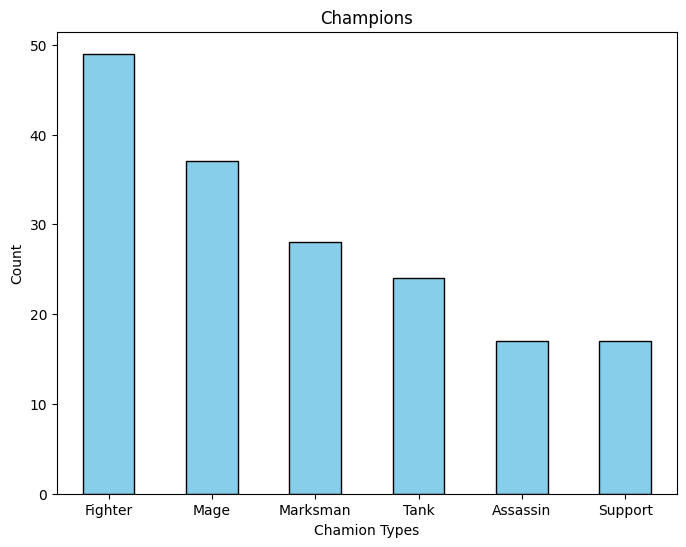

In [17]:
h_type = df['herotype'].value_counts()

plt.figure(figsize=(8, 6))
3
h_type.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Champions')

plt.xlabel('Chamion Types')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.show()

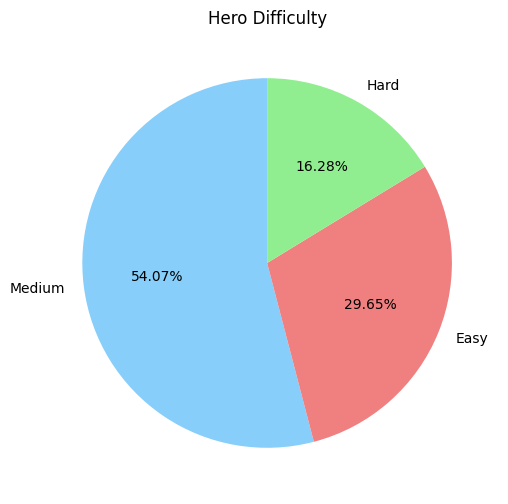

In [18]:
#Pie Chart
s_count = df['difficulty'].value_counts()

name = ['Medium','Easy','Hard']

plt.figure(figsize=(8,6))

plt.pie(s_count, labels=name, autopct='%0.2f%%', startangle=90, colors=['lightskyblue', 'lightcoral','lightgreen'])

plt.title('Hero Difficulty')

plt.show()

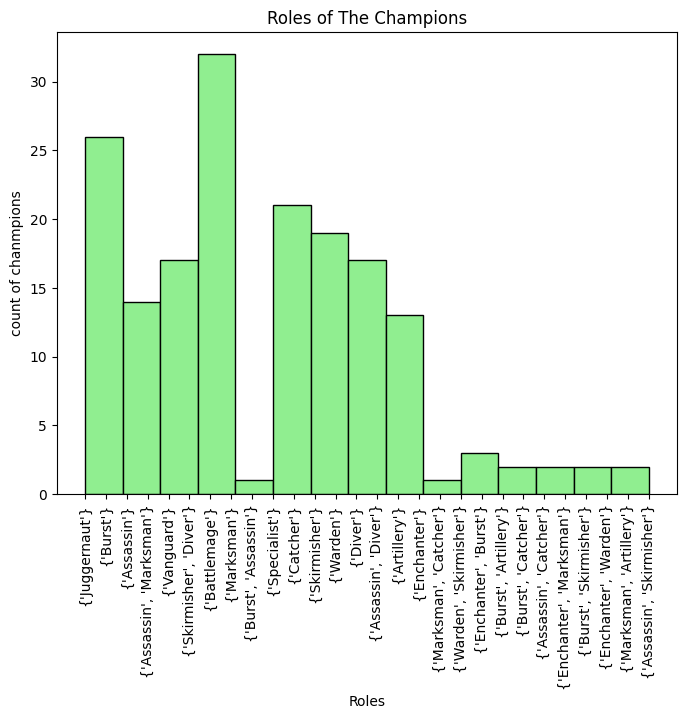

In [19]:
#histpgram

plt.figure(figsize=(8, 6))

plt.hist(df['role'], bins=15, color='lightgreen', edgecolor='black')

plt.title('Roles of The Champions')

plt.xlabel('Roles')

plt.ylabel('count of chanmpions')

plt.xticks(rotation=90)

plt.show()

In [20]:
h_type = df['rangetype'].value_counts()
h_type

rangetype
Melee     91
Ranged    81
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             172 non-null    object 
 7   resource            172 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

## Encoding

In [22]:
features = df[['damage', 'toughness', 'control', 'mobility', 'utility', 'style', 
                 'herotype', 'resource', 'rangetype']]

target = df['role']

In [23]:
categorical_cols = ['herotype', 'resource', 'rangetype']
features_encoded = pd.get_dummies(features, columns=categorical_cols)

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)


## Finding Insights by implementing Machine Learning Algorithms

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, 
                                                    test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM

In [26]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_pred, y_test,zero_division=1)

In [28]:
print('Accuracy: ', accuracy)
print('Confusion Matrix: \n', conf_matrix)
print('Classification Report: \n', class_report)

Accuracy:  0.5142857142857142
Confusion Matrix: 
 [[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           5       1.00      0.67      0.80         3
           6       0.00      1.00      0.00         0
           7       0.00      1.00      0.00         0
           8       0.00 

## Deploying the Project

In [29]:
import joblib

# Save the trained SVM model
joblib.dump(model, "svm_model.pkl")  # Your model is named `model`

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the label encoder for `role`
joblib.dump(label_encoder, "label_encoder.pkl")  # The encoder used for the target variable

# Save the correct feature names
joblib.dump(list(features_encoded.columns), "feature_names.pkl")  # Use `features_encoded`

print("✅ All necessary files for role prediction have been saved successfully!")


✅ All necessary files for role prediction have been saved successfully!


### Now run the 'app_deployed.py' file in VS code